In [1]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display

In [2]:
pic = cv2.imread('boat.jpg')

In [3]:
dim = (512, 512)
pic = cv2.resize(pic, dim)

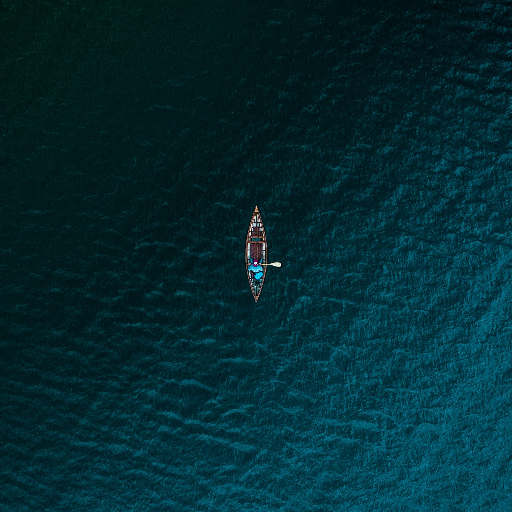

In [4]:
cv2_imshow(pic)

In [5]:
mask = pic[190:318,240:272, :]

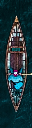

In [6]:
cv2_imshow(mask)

In [7]:
pic_copy = pic.copy()
mask_copy = mask.copy()

In [8]:
# gaussian pyramid of src image
pic_gp = []
for i in range(5):
    pic_copy = cv2.pyrDown(pic_copy)
    pic_gp.append(pic_copy)

# original image is added to the list
pic_gp.insert(0, pic)

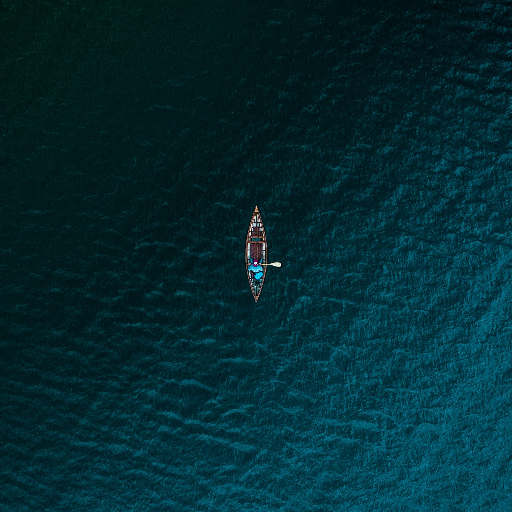

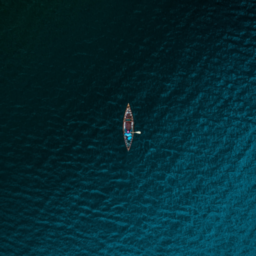

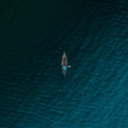

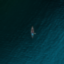

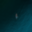

In [9]:
for i in pic_gp:
  cv2_imshow(i)

In [10]:
# gaussian pyramid of mask image
mask_gp = []
for i in range(5):
    mask_copy = cv2.pyrDown(mask_copy)
    mask_gp.append(mask_copy)

mask_gp.insert(0, mask)

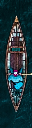

In [11]:
for i in mask_gp:
  cv2_imshow(i)

In [12]:
def get_laplacian_pyramids(gaussian_pyramids):
  result = []
  for i in range(5, 0, -1):
    GE = cv2.pyrUp(gaussian_pyramids[i])
    L = cv2.subtract(gaussian_pyramids[i-1],GE)
    result.append(L)

  return result

In [13]:
pic_lp = get_laplacian_pyramids(pic_gp)
mask_lp = get_laplacian_pyramids(mask_gp)

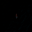

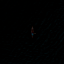

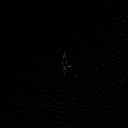

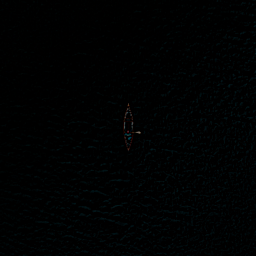

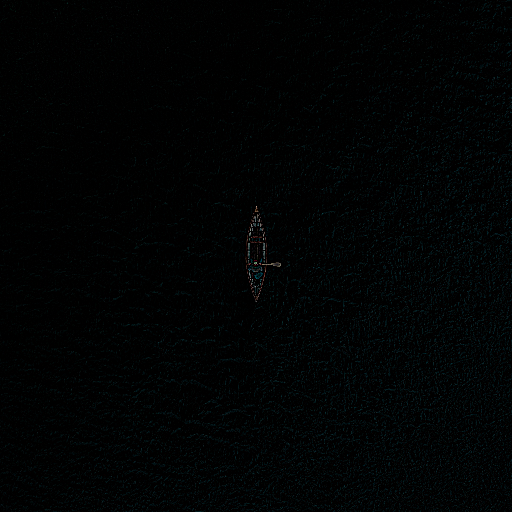

In [14]:
for q in pic_lp:
  cv2_imshow(q)

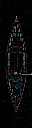

In [15]:
for i in mask_lp:
  cv2_imshow(i)

In [16]:
def merge_image(imgs1, imgs2, a, b):
  '''
  returns merged images by a (which is x_axis starting position)
  and b (which is y_axis starting position)
  '''
  merged_images = []

  for i in range(len(imgs1) - 1):

    img1 = imgs1[i]
    img2 = imgs2[i]

    new_image = img1.copy()
    mask_image = img2.copy()

    x_axis = img2.shape[0]
    y_axis = img2.shape[1]

    new_image[a:a + x_axis, b:b + y_axis, :] = img2

    # divide the positions by two because images on list are half of the previous image
    a = a//2
    b = b//2

    merged_images.append(new_image)


  return merged_images

In [17]:
# for turn into list bigger to smaller
pic_lp.reverse()
mask_lp.reverse()

In [18]:
laplacian_merged = merge_image(pic_lp, mask_lp, 330, 190)

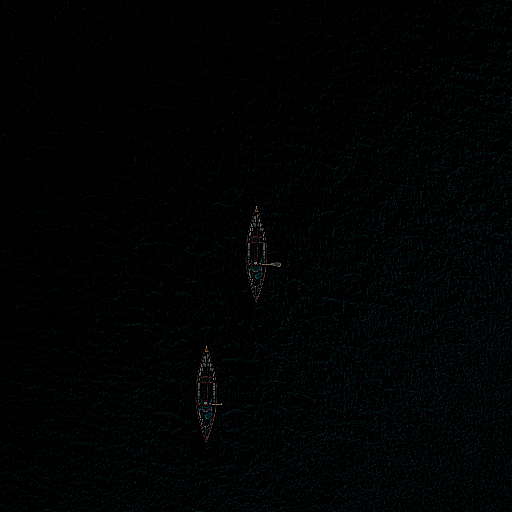

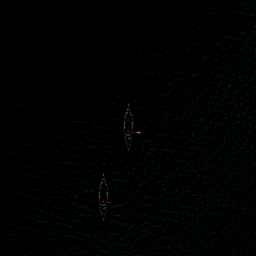

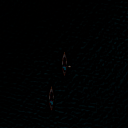

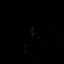

In [19]:
for t in laplacian_merged:
  cv2_imshow(t)

In [20]:
gaussian_merged = merge_image(pic_gp, mask_gp, 330, 190)

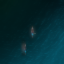

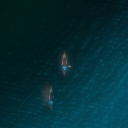

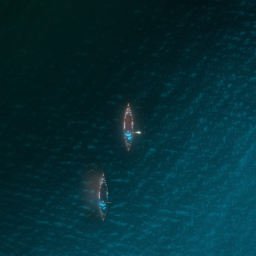

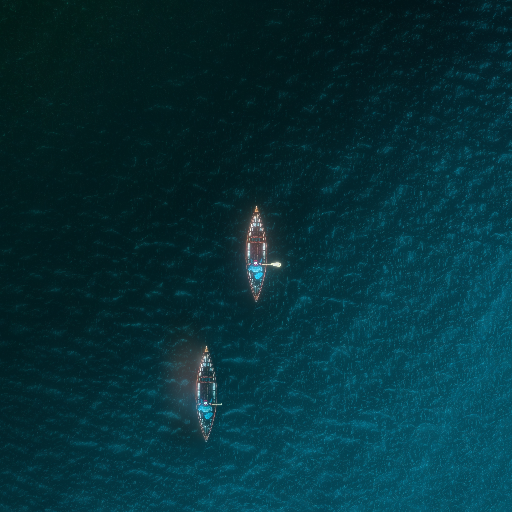

In [30]:
canv1 = gaussian_merged[-1] # smallest one is chosen
for i in range(len(gaussian_merged) - 1, 0, -1):
  canv1 = cv2.pyrUp(canv1)
  canv1 = cv2.add(canv1, laplacian_merged[i - 1])
  cv2_imshow(canv1)